In [1]:
# importing the needed packages
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense

In [2]:
# reading the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# splitting and normalizing the training, validation and test sets
X_train, y_train = X_train_full[:-10000]/255., y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:]/255., y_train_full[-10000:]
X_test = X_test/255.

In [4]:
# fixing the random numbers generator (optionally the random.seed and np.random.seed)
# np.random.seed(42)
tf.random.set_seed(42)

# creating a sequantial model of an input, three hidden and an output layer
model = Sequential()
model.add(InputLayer(shape=[28, 28]))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,860 (175.23 KB)

 Trainable params: 44,860 (175.23 KB)

 Non-trainable params: 0 (0.00 B)

The model contains 44,860 trainable parameters.

In [6]:
# compiling the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8248 - loss: 0.5880 - val_accuracy: 0.9538 - val_loss: 0.1614
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9503 - loss: 0.1639 - val_accuracy: 0.9621 - val_loss: 0.1300
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9636 - loss: 0.1180 - val_accuracy: 0.9639 - val_loss: 0.1187
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9717 - loss: 0.0922 - val_accuracy: 0.9678 - val_loss: 0.1131
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9783 - loss: 0.0746 - val_accuracy: 0.9680 - val_loss: 0.1148
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9813 - loss: 0.0623 - val_accuracy: 0.9673 - val_loss: 0.1265
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0536 - val_accuracy: 0.9694 - val_loss: 0.1194
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9855 - loss: 0

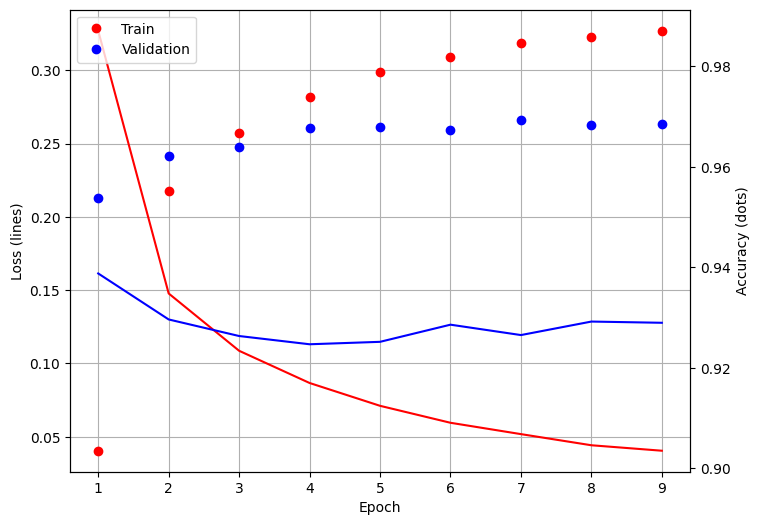

In [8]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9644 - loss: 0.1205

The accuracy on the test set is: 96.7%


##### Using 200 nodes in each hidden layer instead of 50.

In [10]:
tf.random.set_seed(42)

# creating a sequantial model of an input, three hidden and an output layer
model = Sequential()
model.add(InputLayer(shape=[28, 28]))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

# compiling the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239,410 (935.20 KB)

 Trainable params: 239,410 (935.20 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#using early stopping method
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8750 - loss: 0.4001 - val_accuracy: 0.9606 - val_loss: 0.1266
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9666 - loss: 0.1095 - val_accuracy: 0.9693 - val_loss: 0.1044
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0702 - val_accuracy: 0.9726 - val_loss: 0.0964
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9840 - loss: 0.0534 - val_accuracy: 0.9755 - val_loss: 0.0972
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9866 - loss: 0.0439 - val_accuracy: 0.9701 - val_loss: 0.1223
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9882 - loss: 0.0376 - val_accuracy: 0.9746 - val_loss: 0.1094
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0347 - val_accuracy: 0.9743 - val_loss: 0.1133
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0

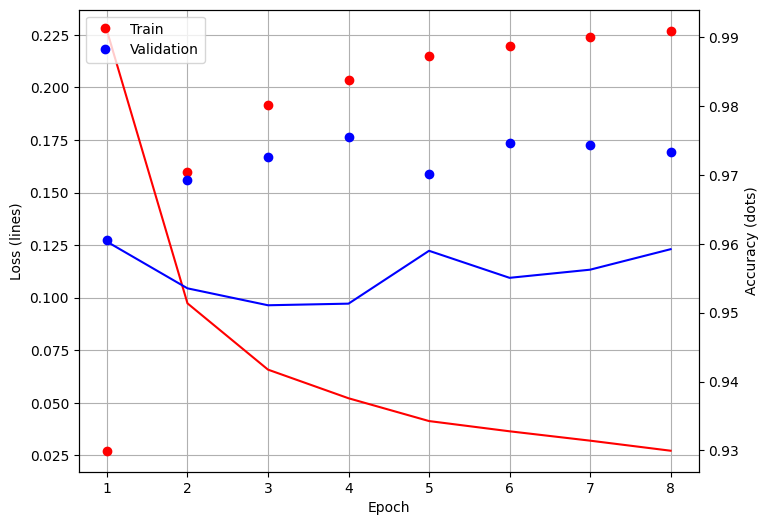

In [13]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

##### The training process stopped after 9 epochs as the model began to overfit the training data in the fourth epoch.

##### Incorporating a regularization method such as Dropout to address the issue of overfitting during the training process.

In [14]:
from tensorflow.keras.layers import Dropout

In [15]:
tf.random.set_seed(42)

# creating a sequantial model of an input, three hidden and an output layer
model = Sequential()
model.add(InputLayer(shape=[28, 28]))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(200, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(200, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation="softmax"))

# compiling the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239,410 (935.20 KB)

 Trainable params: 239,410 (935.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8179 - loss: 0.5845 - val_accuracy: 0.9592 - val_loss: 0.1385
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9466 - loss: 0.1850 - val_accuracy: 0.9682 - val_loss: 0.1067
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9591 - loss: 0.1401 - val_accuracy: 0.9713 - val_loss: 0.1060
Epoch 4/100
1079/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1210

In [ ]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

##### Both models with 200 nodes per hidden layer outperform the model with 50 nodes per hidden layer. Additionally, by utilizing a regularization method, the model avoid overfitting and exhibits improved learning curves. Consequently, the regularized model achieves better results on the test set compared to the model without regularization.